<a href="https://colab.research.google.com/github/malaaaky/Melbourne-Housing_Regression/blob/main/Housing_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [359]:
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt

In [360]:
df_full= pd.read_csv('/content/Melbourne_housing_FULL.csv', sep=',',encoding='latin-1')
#show all columns
pd.set_option('display.max_columns', None)
df_full.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


#Data Preprocessing

In [361]:
df_full.shape

(34857, 21)

In [362]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [363]:
df_full.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


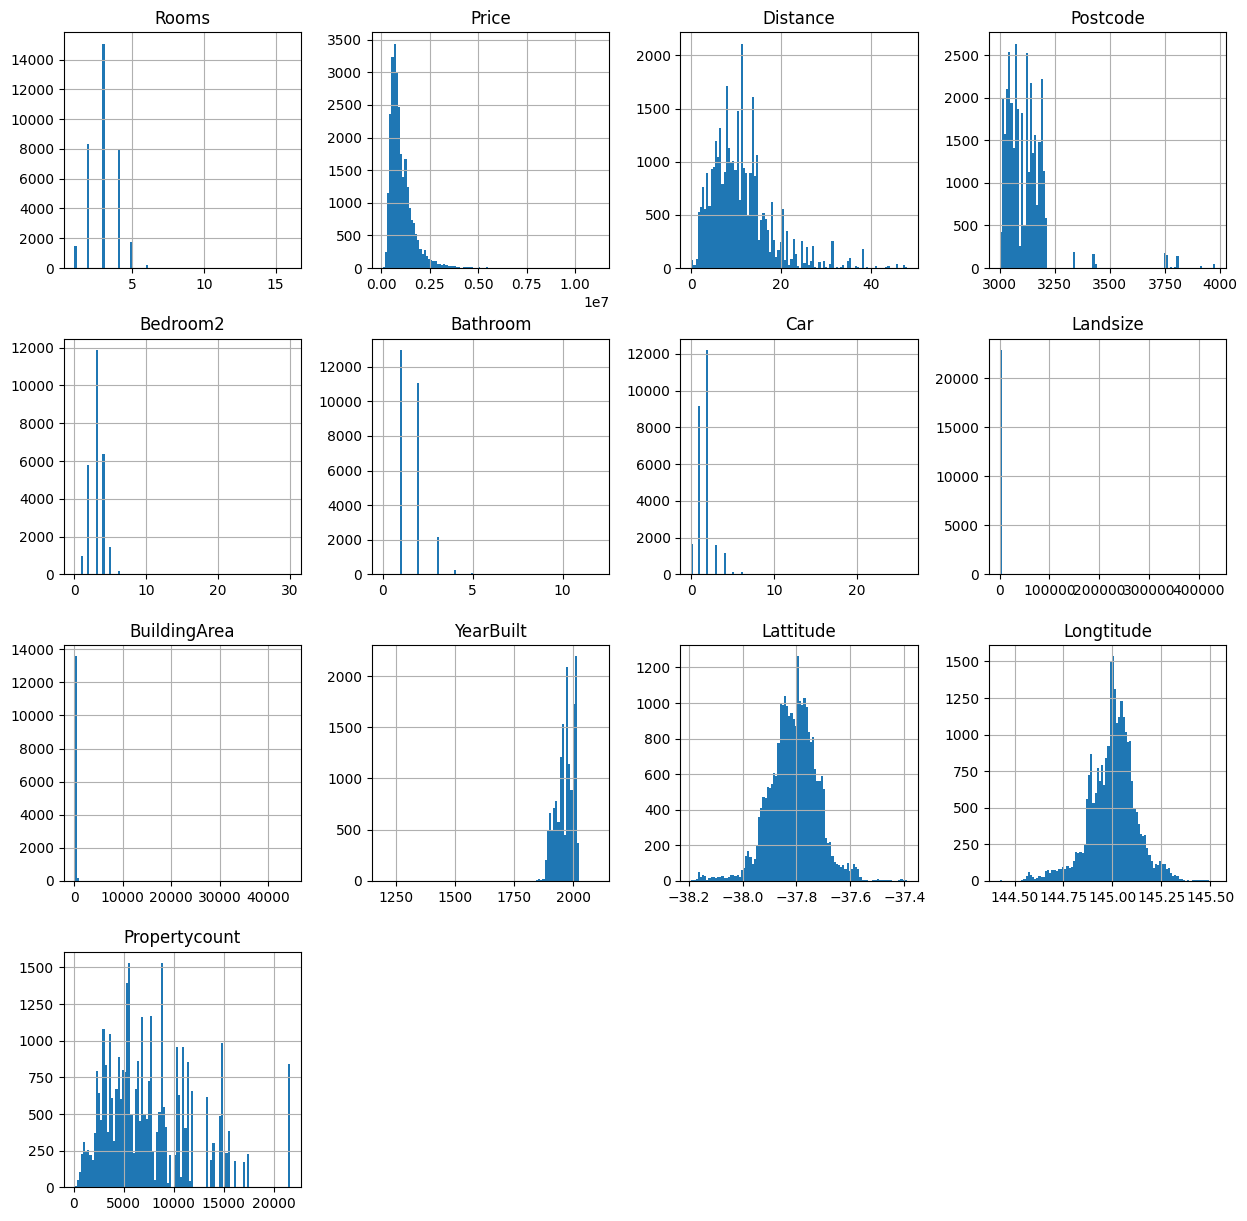

In [364]:
df_full.hist(bins=100,figsize=(15,15))
plt.show()
# bulding area wa landsize needs scaling

#Duplicates

In [365]:
df_full.nunique() #uninque values

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [366]:
df_full.drop_duplicates(inplace=True)
df_full.duplicated().sum()

0

#Missing Values

In [367]:
#percentage of nulls
df_full.isnull().sum()/df_full.shape[0]*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.829814
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bedroom2         23.574134
Bathroom         23.599954
Car              25.040165
Landsize         33.882258
BuildingArea     60.577806
YearBuilt        55.387882
CouncilArea       0.008607
Lattitude        22.882717
Longtitude       22.882717
Regionname        0.008607
Propertycount     0.008607
dtype: float64

<Axes: >

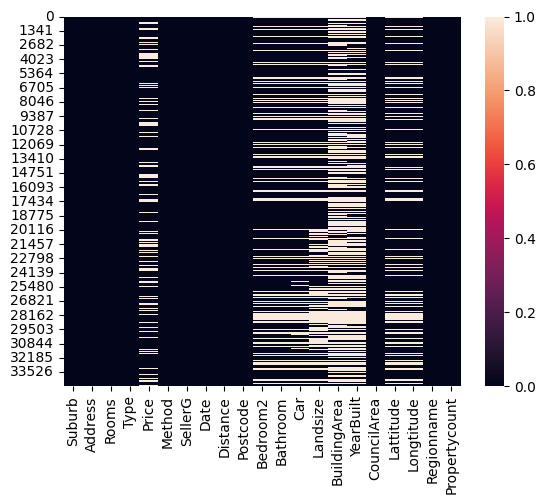

In [368]:
sns.heatmap(df_full.isnull())

<ipython-input-369-631bc76209a0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_full['Distance'])


<Axes: xlabel='Distance', ylabel='Density'>

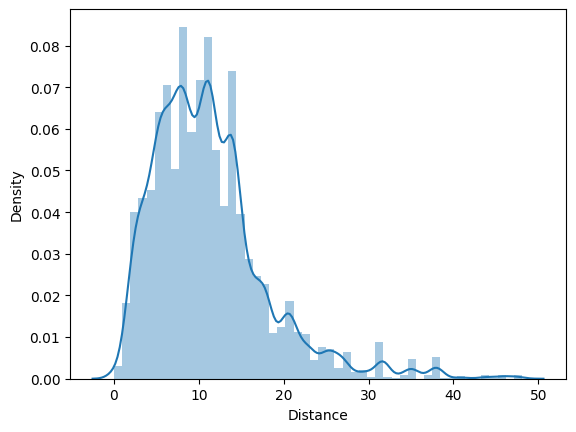

In [369]:
#show distance plot
sns.distplot(df_full['Distance'])

In [370]:
#drop small percentage less than 5%
df_full.dropna(subset = ['Distance','Postcode','CouncilArea','Regionname','Propertycount'], inplace=True)
df_full.shape

(34853, 21)

<ipython-input-371-59edfd5fe4a5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_full['Distance']) # didn't change


<Axes: xlabel='Distance', ylabel='Density'>

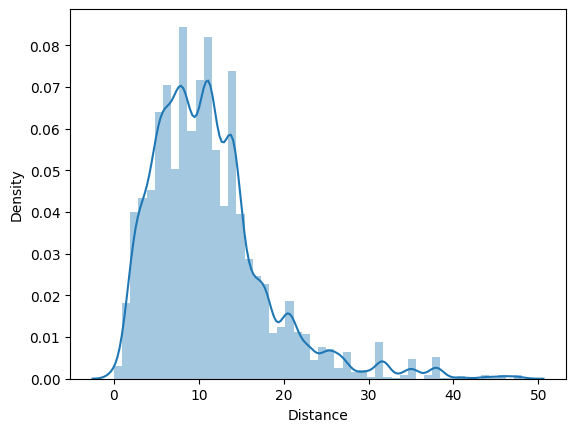

In [371]:
sns.distplot(df_full['Distance']) # didn't change

In [372]:
#to remove features oon copy
df_drop =df_full.copy()

In [373]:
#drop BuildingArea , YearBuilt  more than 40%
df_drop.drop(['BuildingArea', 'YearBuilt'], axis=1, inplace=True)
df_drop.shape

(34853, 19)

In [374]:
df_drop.columns[df_drop.isnull().any()] # all columns with missing values

Index(['Price', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'Lattitude',
       'Longtitude'],
      dtype='object')

In [375]:
df_drop.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7609
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2          8214
Bathroom          8223
Car               8725
Landsize         11807
CouncilArea          0
Lattitude         7973
Longtitude        7973
Regionname           0
Propertycount        0
dtype: int64

## Feature Selection using corr matrix for Regression Model


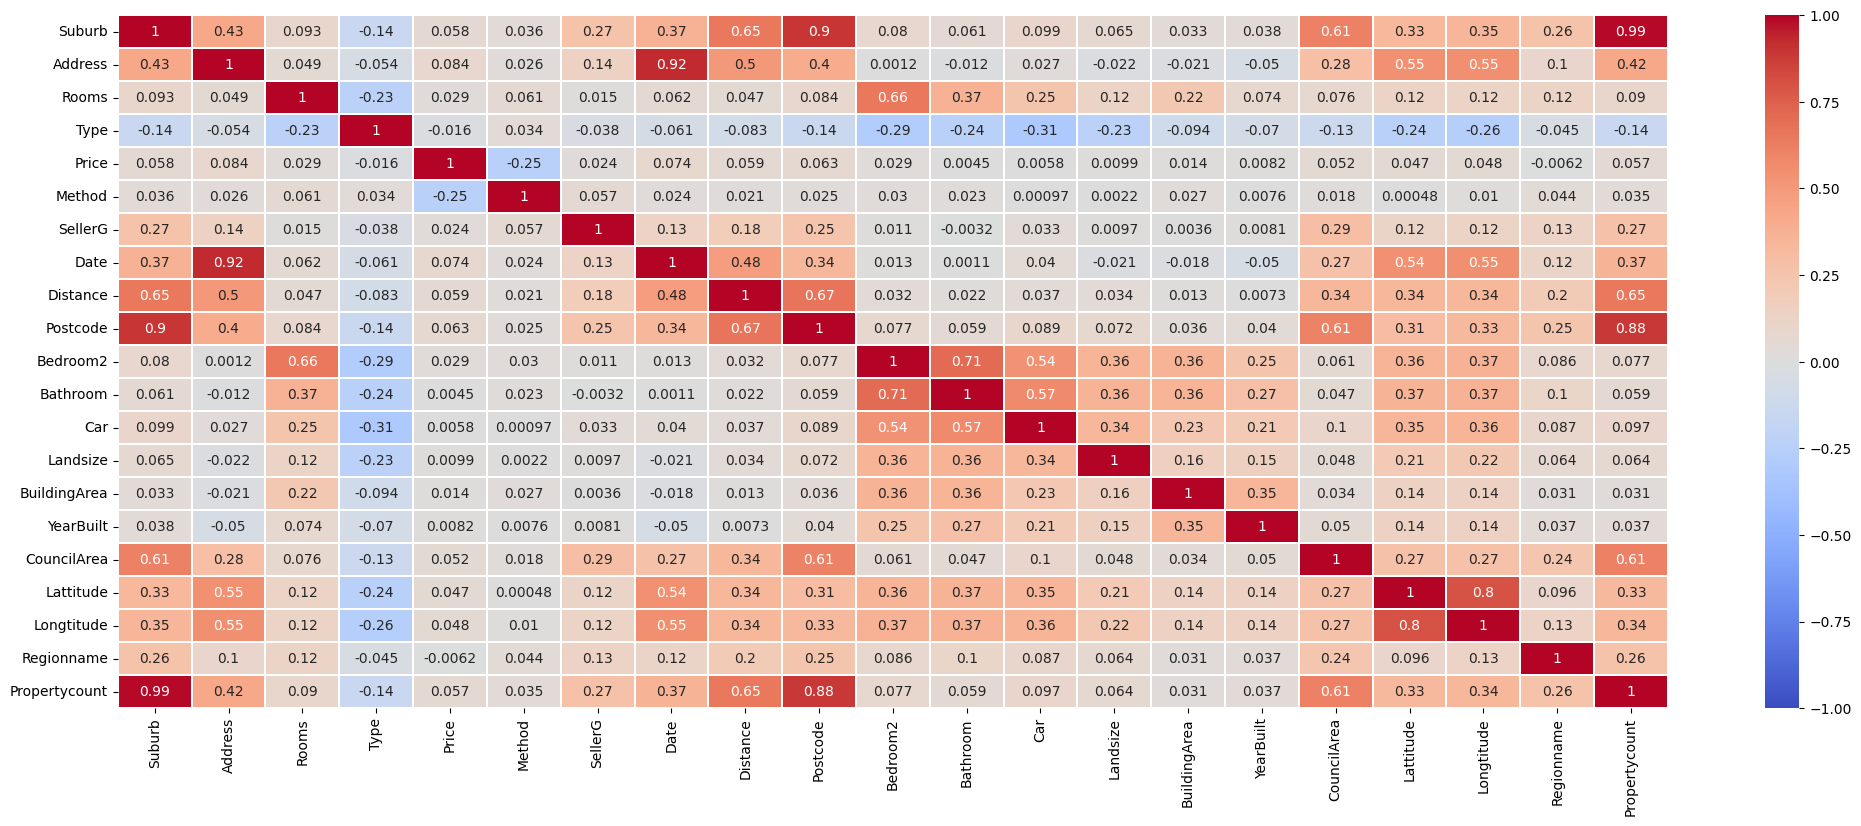

In [376]:
#plot corr matrix using lambda to convert all columns after converting them to numeric and display only the lower part of the matrix
plt.figure(figsize=(25, 9))

corr = df_full.apply(lambda x: pd.factorize(x)[0]).corr()


ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)


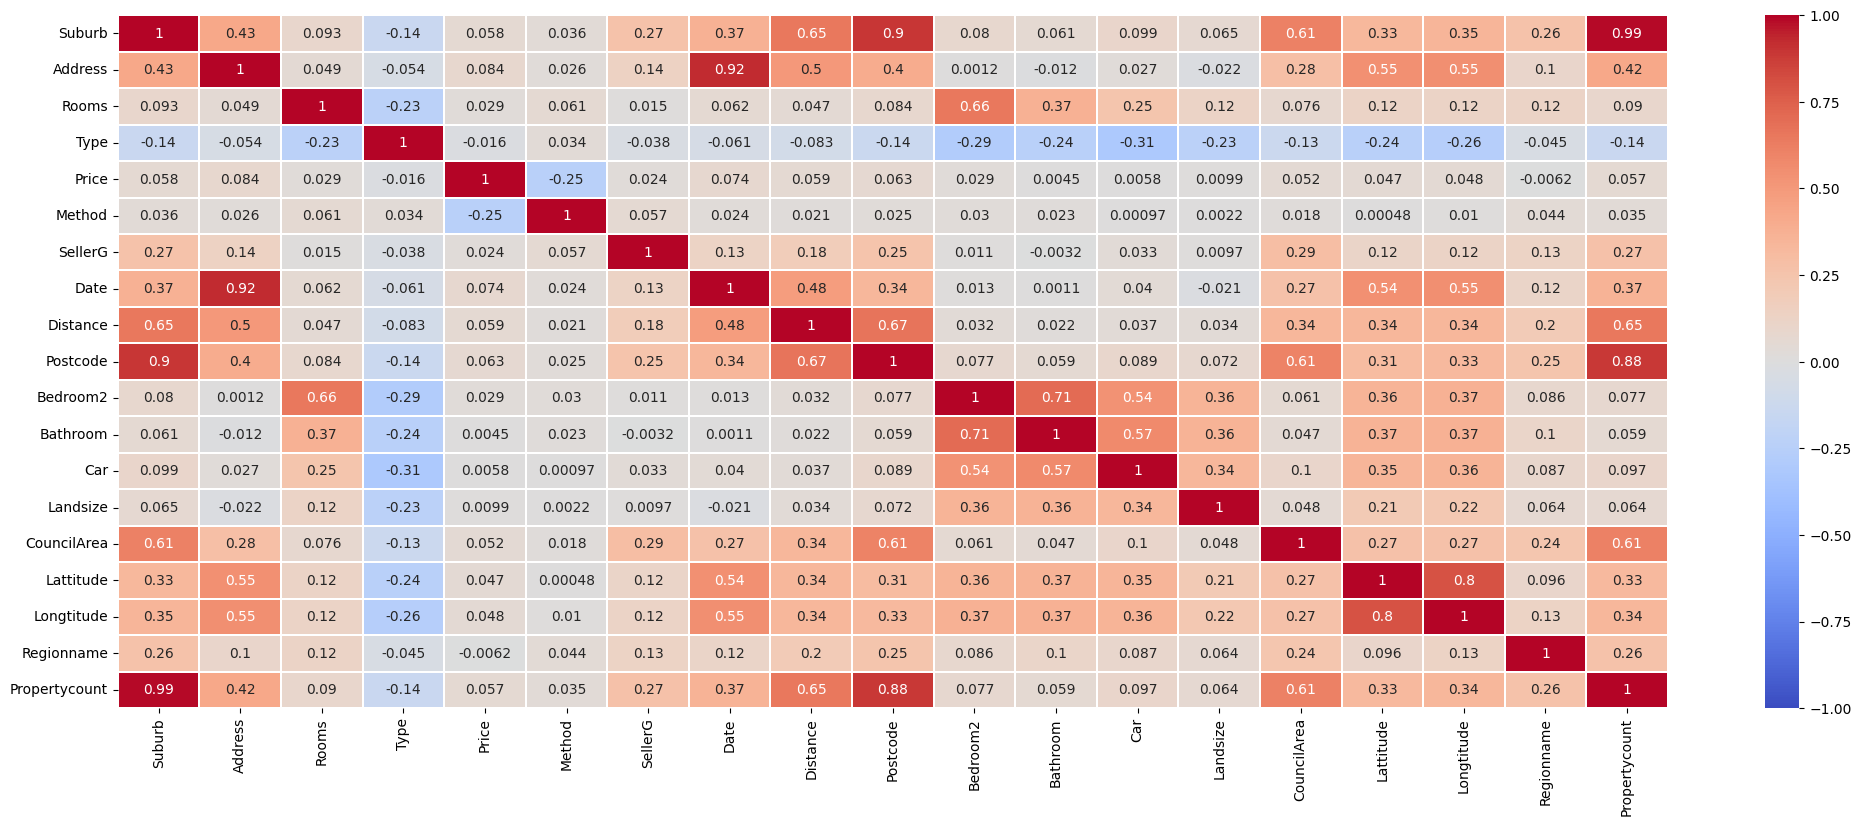

In [377]:
#plot corr matrix using lambda to convert all columns after converting them to numeric and display only the lower part of the matrix
plt.figure(figsize=(25, 9))

corr = df_drop.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)


In [378]:
df_drop['Longtitude'].value_counts()

Longtitude
144.99660    21
144.99100    17
144.98500    17
145.01040    17
144.99110    16
             ..
145.03589     1
145.05096     1
145.05823     1
145.05037     1
144.89351     1
Name: count, Length: 14524, dtype: int64

In [379]:
df_drop.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount'],
      dtype='object')

In [380]:
#can remove suburb due high correlation with proprety count & address with date
df_drop.drop(['Postcode','Address','Lattitude'],axis=1, inplace=True)

In [381]:
#remove very little correlation with price
df_drop.drop(['Regionname','Propertycount'],axis=1, inplace=True)

In [382]:
df_drop.drop(['Longtitude'],axis=1, inplace=True)

In [383]:
df_drop.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Bedroom2,Bathroom,Car,Landsize,CouncilArea
0,Abbotsford,2,h,NaN,SS,Jellis,3/09/2016,2.5,2.0,1.0,1.0,126.0,Yarra City Council
1,Abbotsford,2,h,1480000.0,S,Biggin,3/12/2016,2.5,2.0,1.0,1.0,202.0,Yarra City Council
2,Abbotsford,2,h,1035000.0,S,Biggin,4/02/2016,2.5,2.0,1.0,0.0,156.0,Yarra City Council
3,Abbotsford,3,u,NaN,VB,Rounds,4/02/2016,2.5,3.0,2.0,1.0,0.0,Yarra City Council
4,Abbotsford,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3.0,2.0,0.0,134.0,Yarra City Council


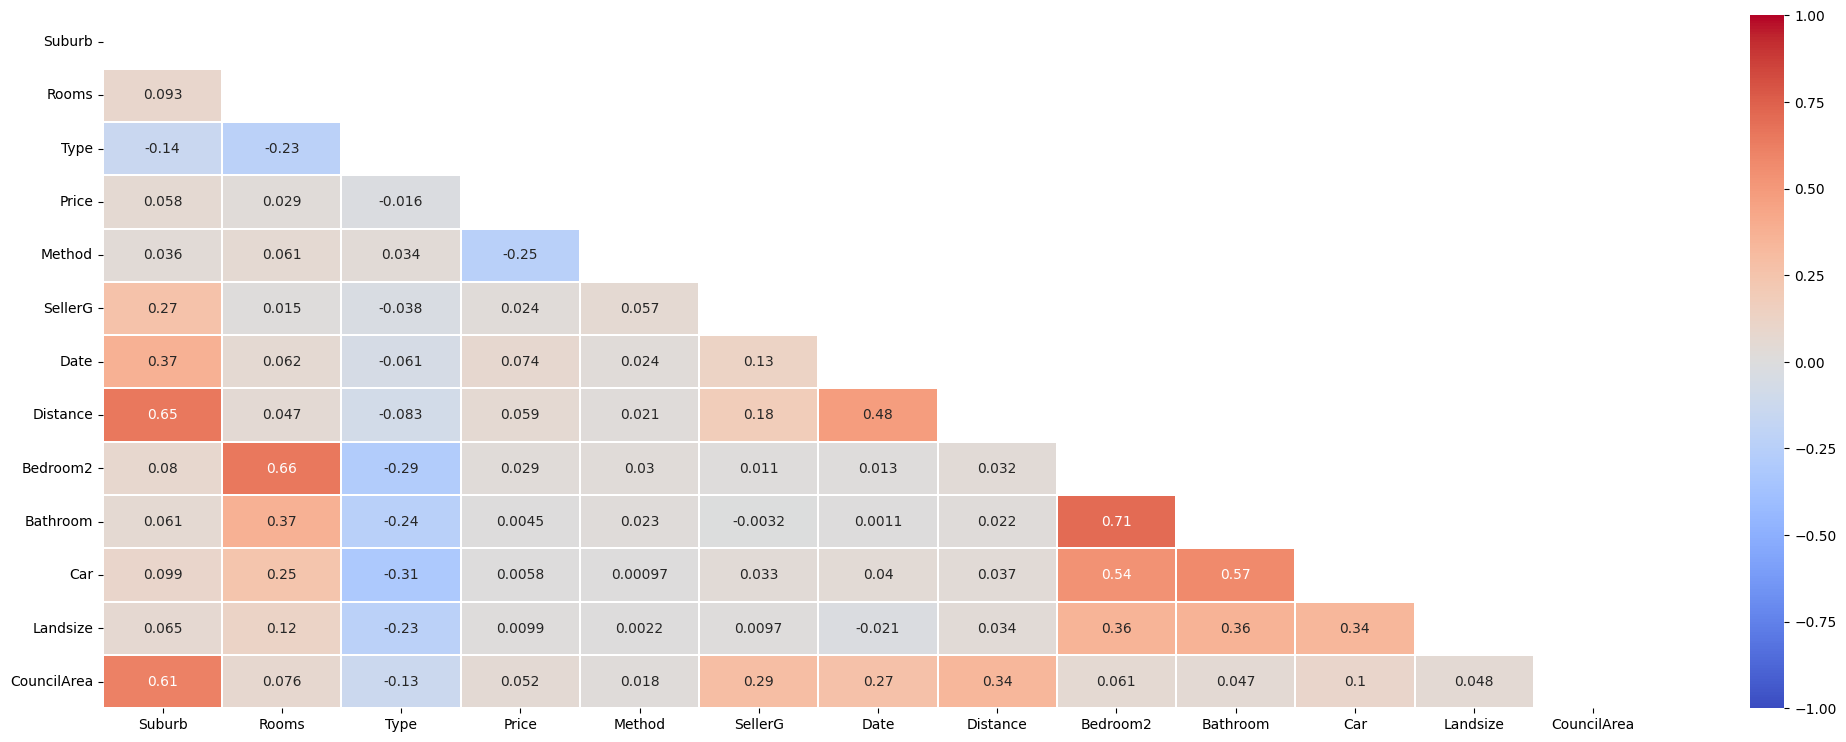

In [384]:
plt.figure(figsize=(25, 9))

corr = df_drop.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr,mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

##Fill missing Values

In [385]:
#filtering mask with isna to show all missing values
filter =df_drop['Car'].isna()
df_drop[filter]

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Bedroom2,Bathroom,Car,Landsize,CouncilArea
15,Abbotsford,3,h,1000000.0,S,Jellis,8/10/2016,2.5,NaN,NaN,NaN,NaN,Yarra City Council
16,Abbotsford,2,t,745000.0,S,Jellis,8/10/2016,2.5,NaN,NaN,NaN,NaN,Yarra City Council
19,Abbotsford,2,u,542000.0,S,Dingle,8/10/2016,2.5,NaN,NaN,NaN,NaN,Yarra City Council
21,Abbotsford,2,u,760000.0,SP,Biggin,10/12/2016,2.5,NaN,NaN,NaN,NaN,Yarra City Council
22,Abbotsford,1,u,481000.0,SP,Purplebricks,10/12/2016,2.5,NaN,NaN,NaN,NaN,Yarra City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34840,Williamstown,2,u,520000.0,VB,Raine,24/02/2018,6.8,NaN,NaN,NaN,NaN,Hobsons Bay City Council
34842,Williamstown,3,h,1400000.0,SP,Sweeney,24/02/2018,6.8,3.0,2.0,NaN,325.0,Hobsons Bay City Council
34844,Windsor,1,u,440000.0,SP,Biggin,24/02/2018,4.6,NaN,NaN,NaN,NaN,Port Phillip City Council
34851,Yarraville,3,h,1101000.0,S,Jas,24/02/2018,6.3,3.0,1.0,NaN,288.0,Maribyrnong City Council


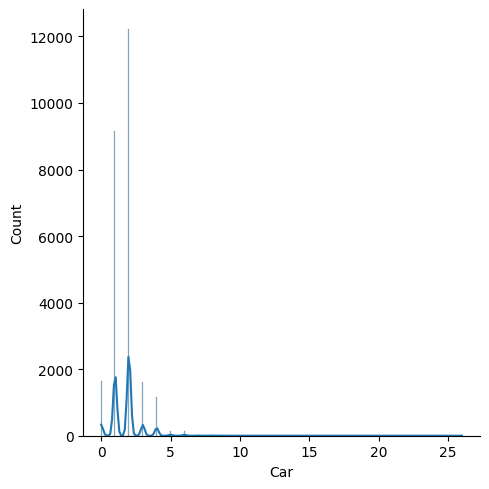

In [386]:
sns.displot(df_drop['Car'], kde=True)
plt.show()

In [387]:
#didn't work because it generate a float number can't have 3.08 rooms------> solution can round it up
from sklearn.impute import KNNImputer

# Create an instance of the KNNImputer class
imputer = KNNImputer(n_neighbors=7)

# Fit and transform the imputer on the single column
impute_result = imputer.fit_transform(df_drop[['Car']])

# Replace the original column with the imputed values
df_drop['Car_impute'] = impute_result

# Print the imputed dataset
print("\nImputed dataset:\n", df_drop)


Imputed dataset:
            Suburb  Rooms Type      Price Method        SellerG        Date  \
0      Abbotsford      2    h        NaN     SS         Jellis   3/09/2016   
1      Abbotsford      2    h  1480000.0      S         Biggin   3/12/2016   
2      Abbotsford      2    h  1035000.0      S         Biggin   4/02/2016   
3      Abbotsford      3    u        NaN     VB         Rounds   4/02/2016   
4      Abbotsford      3    h  1465000.0     SP         Biggin   4/03/2017   
...           ...    ...  ...        ...    ...            ...         ...   
34852  Yarraville      4    h  1480000.0     PI            Jas  24/02/2018   
34853  Yarraville      2    h   888000.0     SP        Sweeney  24/02/2018   
34854  Yarraville      2    t   705000.0      S            Jas  24/02/2018   
34855  Yarraville      3    h  1140000.0     SP  hockingstuart  24/02/2018   
34856  Yarraville      2    h  1020000.0     PI             RW  24/02/2018   

       Distance  Bedroom2  Bathroom  Car  La

In [388]:
df_drop.isnull().sum()

Suburb             0
Rooms              0
Type               0
Price           7609
Method             0
SellerG            0
Date               0
Distance           0
Bedroom2        8214
Bathroom        8223
Car             8725
Landsize       11807
CouncilArea        0
Car_impute         0
dtype: int64

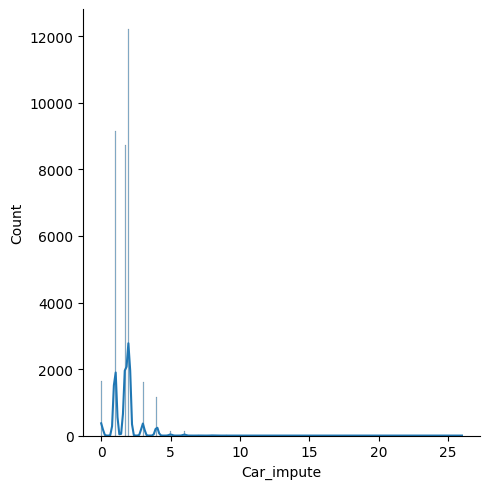

In [389]:
sns.displot(df_drop['Car_impute'], kde=True)
plt.show()

In [390]:
df_drop['Car_impute'].value_counts() #has floats

Car_impute
2.000000     12213
1.000000      9164
1.728835      8725
0.000000      1631
3.000000      1606
4.000000      1161
5.000000       151
6.000000       140
7.000000        25
8.000000        23
10.000000        6
9.000000         3
11.000000        2
26.000000        1
18.000000        1
12.000000        1
Name: count, dtype: int64

In [391]:
df_drop['Car_impute'] = round(df_drop['Car_impute']) #round up

In [392]:
df_drop['Car_impute'].value_counts()

Car_impute
2.0     20938
1.0      9164
0.0      1631
3.0      1606
4.0      1161
5.0       151
6.0       140
7.0        25
8.0        23
10.0        6
9.0         3
11.0        2
26.0        1
18.0        1
12.0        1
Name: count, dtype: int64

<ipython-input-393-28dbce6fcfd1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df_drop["Bathroom"], hist=True, kde=True, rug=False )


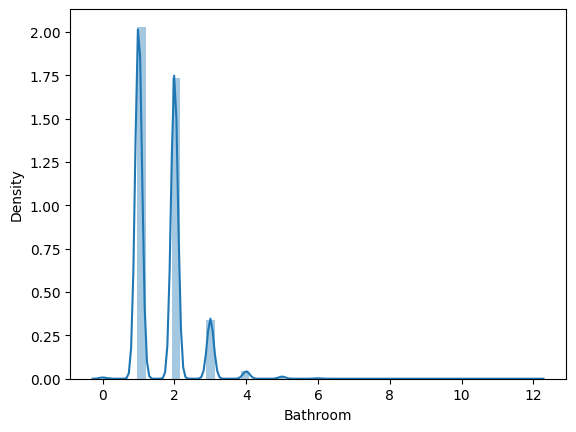

In [393]:
sns.distplot( df_drop["Bathroom"], hist=True, kde=True, rug=False )
plt.show()

In [394]:
#fill randomly
fill_list = df_drop['Bathroom'].dropna()
df_drop['Bathroom_impute'] = df_drop['Bathroom'].fillna(pd.Series(np.random.choice(fill_list , len(df_drop.index))))

<ipython-input-395-f01f0233eed5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df_drop["Bathroom_impute"], hist=True, kde=True, rug=False )


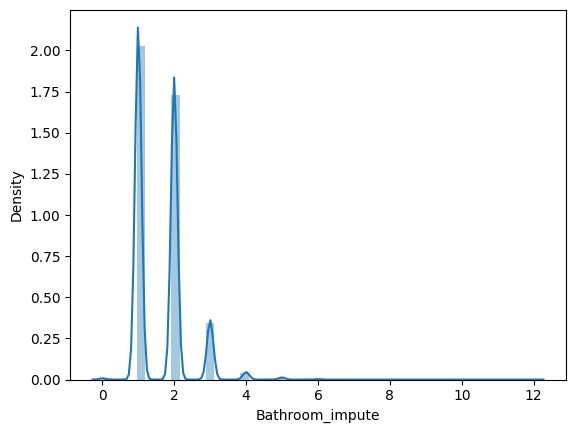

In [395]:
sns.distplot( df_drop["Bathroom_impute"], hist=True, kde=True, rug=False )
plt.show()

In [396]:
df_drop.drop(['Bathroom','Car'],axis=1, inplace=True)
df_drop.isnull().sum()

Suburb                 0
Rooms                  0
Type                   0
Price               7609
Method                 0
SellerG                0
Date                   0
Distance               0
Bedroom2            8214
Landsize           11807
CouncilArea            0
Car_impute             0
Bathroom_impute        1
dtype: int64

In [397]:
df_drop['Landsize_impute'] = df_drop['Landsize'].interpolate(method='linear', limit_direction='forward')
df_drop.drop(['Landsize'], axis=1, inplace=True)
df_drop['Landsize_impute']

0        126.0
1        202.0
2        156.0
3          0.0
4        134.0
         ...  
34852    593.0
34853     98.0
34854    220.0
34855    235.0
34856    250.0
Name: Landsize_impute, Length: 34853, dtype: float64

<ipython-input-398-1fc9986ba24c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df_drop['Bedroom2'], hist=True, kde=True, rug=False )


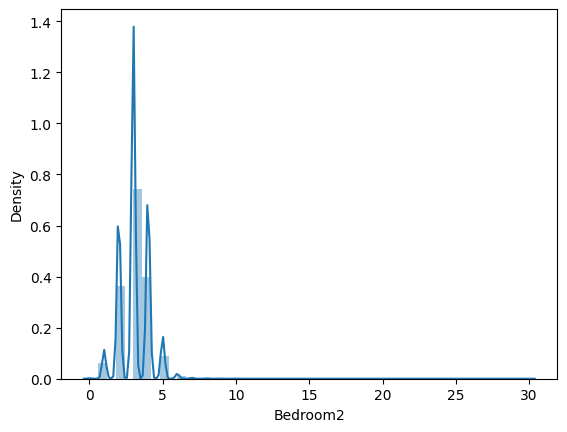

In [398]:
sns.distplot( df_drop['Bedroom2'], hist=True, kde=True, rug=False )
plt.show()

In [399]:
#make it include nan
df_drop['Bedroom2'].value_counts(dropna=False)

Bedroom2
3.0     11880
NaN      8214
4.0      6348
2.0      5777
5.0      1427
1.0       966
6.0       168
7.0        30
0.0        17
8.0        13
9.0         5
10.0        4
30.0        1
20.0        1
16.0        1
12.0        1
Name: count, dtype: int64

In [400]:
df_drop.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date',
       'Distance', 'Bedroom2', 'CouncilArea', 'Car_impute', 'Bathroom_impute',
       'Landsize_impute'],
      dtype='object')

In [401]:
# Fill missing values in 'Bedroom2' based on 'Rooms' using the computed ratio
df_drop['Bedroom2_impute'] = df_drop.apply(
    lambda row: row['Rooms'] - row['Bathroom_impute'] if pd.isnull(row['Bedroom2']) else row['Bedroom2'],
    axis=1
)
df_drop.drop(['Bedroom2'], axis=1, inplace=True)

In [402]:
df_drop.isnull().sum()

Suburb                0
Rooms                 0
Type                  0
Price              7609
Method                0
SellerG               0
Date                  0
Distance              0
CouncilArea           0
Car_impute            0
Bathroom_impute       1
Landsize_impute       0
Bedroom2_impute       1
dtype: int64

In [403]:
df_drop.dropna(subset=['Bathroom_impute','Bedroom2_impute'], inplace=True)

In [404]:
df_drop.isnull().sum()

Suburb                0
Rooms                 0
Type                  0
Price              7609
Method                0
SellerG               0
Date                  0
Distance              0
CouncilArea           0
Car_impute            0
Bathroom_impute       0
Landsize_impute       0
Bedroom2_impute       0
dtype: int64

<ipython-input-405-ffdc91bb4f92>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df_drop['Bedroom2_impute'], hist=True, kde=True, rug=False )


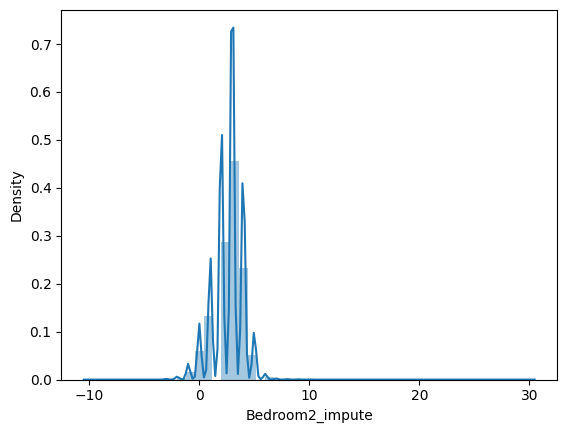

In [405]:
# DE GHALAAAAT
sns.distplot( df_drop['Bedroom2_impute'], hist=True, kde=True, rug=False )
plt.show()

In [406]:
df_drop['Price'].value_counts(dropna=False)

Price
NaN          7609
600000.0      235
1100000.0     235
650000.0      219
800000.0      217
             ... 
1452000.0       1
2555000.0       1
949500.0        1
426500.0        1
1605500.0       1
Name: count, Length: 2872, dtype: int64

#Data Encoding

In [407]:
#the names of object columns
objList= df_drop.select_dtypes(include='object').columns
print(objList)

Index(['Suburb', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea'], dtype='object')


In [408]:
df_full[['Suburb', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea']].head()

,Suburb,Type,Method,SellerG,Date,CouncilArea
0,Abbotsford,h,SS,Jellis,3/09/2016,Yarra City Council
1,Abbotsford,h,S,Biggin,3/12/2016,Yarra City Council
2,Abbotsford,h,S,Biggin,4/02/2016,Yarra City Council
3,Abbotsford,u,VB,Rounds,4/02/2016,Yarra City Council
4,Abbotsford,h,SP,Biggin,4/03/2017,Yarra City Council


In [409]:
from sklearn.preprocessing import LabelEncoder

In [410]:
Suburb_le = LabelEncoder()
Type_le = LabelEncoder()
Method_le = LabelEncoder()
SellerG_le = LabelEncoder()
CouncilArea_le = LabelEncoder()
Date_le = LabelEncoder()

In [411]:
df_drop['Suburb'] = Suburb_le.fit_transform(df_drop["Suburb"])
df_drop['Type'] = Type_le.fit_transform(df_drop["Type"])
df_drop['Method'] = Method_le.fit_transform(df_drop["Method"])
df_drop['SellerG'] = SellerG_le.fit_transform(df_drop["SellerG"])
df_drop['CouncilArea'] = CouncilArea_le.fit_transform(df_drop["CouncilArea"])
df_drop['Date'] = Date_le.fit_transform(df_drop["Date"])

In [412]:
df_drop.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,CouncilArea,Car_impute,Bathroom_impute,Landsize_impute,Bedroom2_impute
0,0,2,0,NaN,6,155,58,2.5,31,1.0,1.0,126.0,2.0
1,0,2,0,1480000.0,2,33,60,2.5,31,1.0,1.0,202.0,2.0
2,0,2,0,1035000.0,2,33,63,2.5,31,0.0,1.0,156.0,2.0
3,0,3,2,NaN,7,296,63,2.5,31,1.0,2.0,0.0,3.0
4,0,3,0,1465000.0,5,33,64,2.5,31,0.0,2.0,134.0,3.0


#Test and Train Split

In [413]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error , mean_absolute_error , mean_squared_error
import statsmodels.api as sm
from scipy import stats

In [414]:
df_drop.dropna(subset=['Price'], inplace=True)  # Drop rows with missing 'Price' values

In [415]:
x = df_drop.drop('Price', axis=1).values
y = df_drop['Price'].values

In [416]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.25 , random_state=42)

#Linear Regression

In [417]:
lr = LinearRegression()

In [418]:
#a3mel drop nan fe price (target)?
lr.fit(x_train , y_train)

LinearRegression()

In [420]:
lr.score(x_train , y_train)

0.4220575307721526

In [421]:
lr.score(x_test , y_test)

0.4279950515168759

In [422]:
y_pred = lr.predict(x_test)
y_pred

array([1052278.86828369, 1331584.82523844,  917295.38097904, ...,
       1296135.37707636, 1177068.42267019, 1045219.26527569])

In [423]:
pred_lr = pd.DataFrame({"y_test": y_test , "y_pred": y_pred})
pred_lr

,y_test,y_pred
0,829000.0,1.052279e+06
1,1340000.0,1.331585e+06
2,531000.0,9.172954e+05
3,1880000.0,1.113804e+06
4,1180000.0,1.249798e+06
...,...,...
6806,627000.0,3.281300e+05
6807,1601000.0,1.506400e+06
6808,1080000.0,1.296135e+06
6809,1224000.0,1.177068e+06


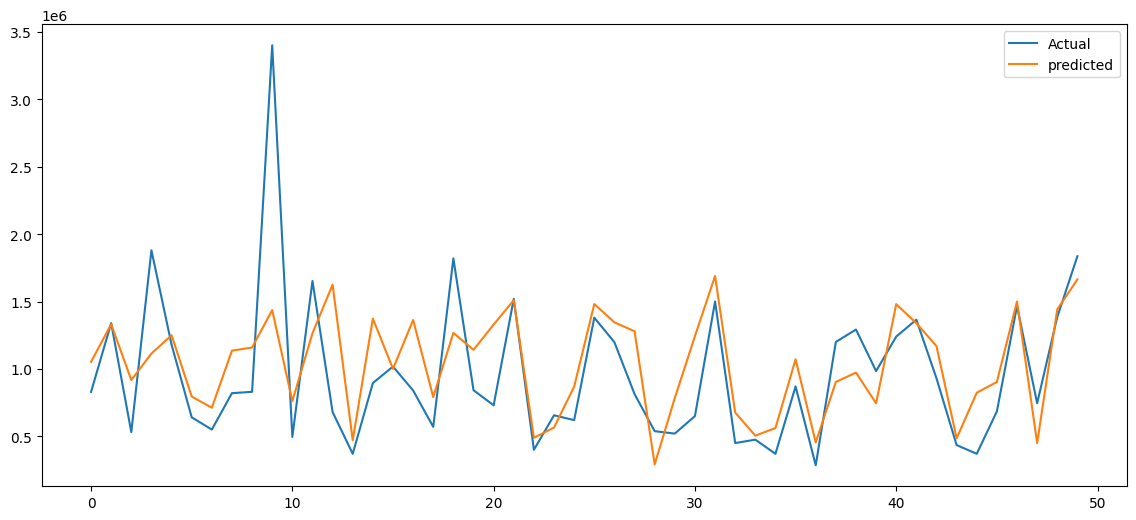

In [424]:
plt.figure(figsize=(14,6))
plt.plot(pred_lr[:50])
plt.legend(['Actual' , 'predicted'])
plt.show()

#Metrics

In [426]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_absolute_percentage_error , mean_squared_error

In [427]:
r2 = r2_score(y_test , y_pred)
r2

0.4279950515168759

#Stats Report

In [428]:
x2 = sm.add_constant(x)
est = sm.OLS(y , x2)
est2 = est.fit()
print (est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     1668.
Date:                Tue, 23 Jul 2024   Prob (F-statistic):               0.00
Time:                        15:19:57   Log-Likelihood:            -3.9543e+05
No. Observations:               27243   AIC:                         7.909e+05
Df Residuals:                   27230   BIC:                         7.910e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.059e+05   1.78e+04     45.226      0.0